In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Flatten


Using TensorFlow backend.
C:\Users\meet\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

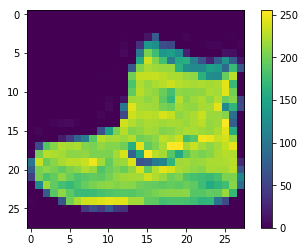

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
x_train = x_train/255
x_test = x_test/255

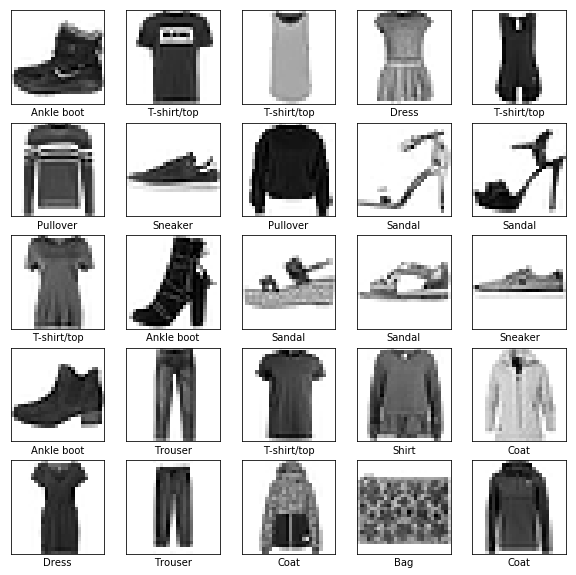

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [10]:
model.fit(x_train,y_train , epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.5803 - accuracy: 0.8061
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4279 - accuracy: 0.8511
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3983 - accuracy: 0.8600
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3814 - accuracy: 0.8646
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3648 - accuracy: 0.8695


In [11]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 38us/step


[0.4126088607549667, 0.8528000116348267]

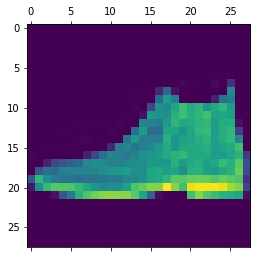

In [12]:
plt.matshow(x_test[0])

In [13]:
yp = model.predict(x_test)

In [14]:
yp[0]
np.argmax(yp[0])

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

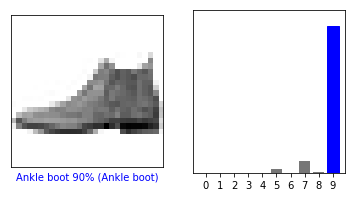

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, yp[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, yp[i],  y_test)
plt.show()

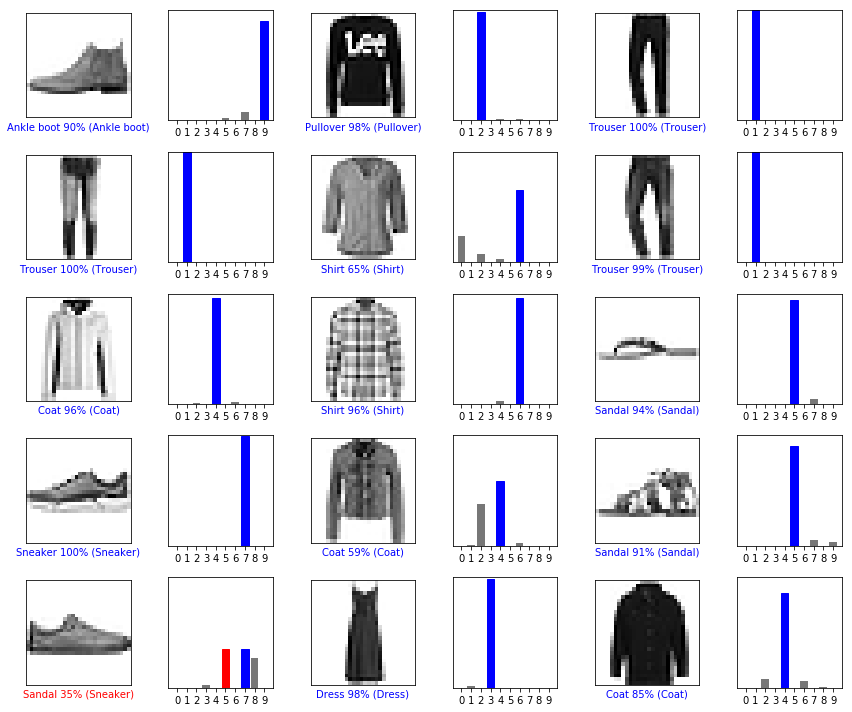

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, yp[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, yp[i], y_test)
plt.tight_layout()
plt.show()